In [2]:
import numpy as np

### Broadcasting 2-dim array

In [3]:
x= np.linspace(0,5,50)
y= np.linspace(0,5,50)[:,np.newaxis]
z= np.sin(x)** 10 + np.cos(10+ y*x)* np.cos(x)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

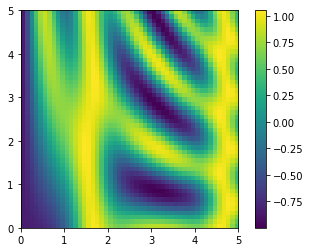

In [5]:
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar();

2차원 함수를 시각화

### ufunc으로서의 비교 연산자

In [6]:
x=np.array([1,2,3,4,5])
x<3

array([ True,  True, False, False, False])

In [7]:
x>3

array([False, False, False,  True,  True])

In [8]:
x<=3

array([ True,  True,  True, False, False])

In [9]:
x>=3

array([False, False,  True,  True,  True])

In [10]:
x!=3

array([ True,  True, False,  True,  True])

In [11]:
x==3

array([False, False,  True, False, False])

In [12]:
(2*x) == (x**2)

array([False,  True, False, False, False])

in 2-dimension

In [16]:
rng=np.random.RandomState(0)
x=rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [18]:
np.count_nonzero(x<6)

8

In [19]:
np.sum(x<6)

8

In [20]:
np.sum(x<6, axis=1)

array([4, 2, 2])

In [21]:
np.any(x>8)

True

In [22]:
np.any(x<0)

False

In [23]:
np.all(x<10)

True

In [24]:
np.all(x==6)

False

In [25]:
np.all(x<8, axis=1)

array([ True, False,  True])

Masking

In [26]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [29]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

### Fancy indexing

In [32]:
import numpy as np
rand=np.random.RandomState(42)
x= rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [36]:
[x[3], x[7], x[4]]

[71, 86, 60]

In [37]:
ind=[3,7,4]
x[ind]

array([71, 86, 60])

In [38]:
ind=np.array([[3,7],
             [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

indexing 배열의 shape을 따라감

In [41]:
X=np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
row=np.array([0,1,2])
col=np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [44]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [45]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

예제: 임의의 점 선택하기

In [46]:
mean=[0,0]
cov=[[1,2],
    [2,5]]
X=rand.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

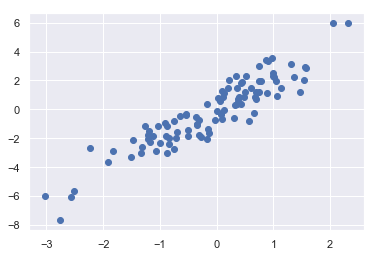

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1]);

정규분포된 점들

In [52]:
indices=np.random.choice(X.shape[0], 20, replace=False)
indices

array([83,  3, 54, 68, 66, 71, 67, 72,  7, 39,  6, 87, 41, 19, 56, 92, 10,
       23, 58, 17])

In [53]:
selection=X[indices]
selection.shape

(20, 2)

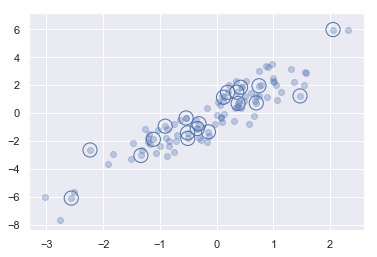

In [74]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(selection[:,0], selection[:,1],edgecolors='b',facecolors='none', s=200);

In [89]:
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99

### partitioning

In [77]:
x=np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

처음 세 개가 배열의 가장 작은 값, 그 이후로는 임의

In [79]:
X=rand.randint(0,10,(4,6))
X

array([[5, 6, 9, 6, 9, 2],
       [1, 8, 7, 9, 6, 8],
       [3, 3, 0, 7, 2, 6],
       [1, 1, 6, 5, 2, 8]])

In [80]:
np.partition(X,2,axis=1)

array([[2, 5, 6, 9, 9, 6],
       [1, 6, 7, 9, 8, 8],
       [0, 2, 3, 7, 3, 6],
       [1, 1, 2, 5, 6, 8]])

각 행에서 가장 작은 값 2개가 처음 2개로 위치

### 예제: k-nearest neighbor

In [82]:
X=rand.rand(10,2)

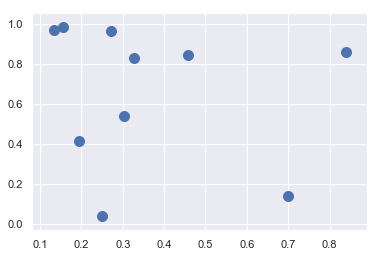

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100);

In [85]:
dist_sq=np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2, axis=-1)
dist_sq

array([[0.00000000e+00, 4.82454879e-01, 8.98325502e-01, 2.19780413e-01,
        5.31572046e-02, 1.38477495e-02, 1.10888092e-01, 3.27002909e-01,
        1.00791989e+00, 6.48509226e-04],
       [4.82454879e-01, 0.00000000e+00, 1.02152374e+00, 3.91477432e-01,
        2.63491680e-01, 3.32925015e-01, 1.46008603e-01, 6.17095716e-01,
        5.40796703e-01, 5.10611452e-01],
       [8.98325502e-01, 1.02152374e+00, 0.00000000e+00, 2.51061264e-01,
        6.28412020e-01, 8.58701966e-01, 6.87966224e-01, 1.41892138e-01,
        2.11739215e-01, 8.80014105e-01],
       [2.19780413e-01, 3.91477432e-01, 2.51061264e-01, 0.00000000e+00,
        8.51037254e-02, 1.84335361e-01, 1.16704690e-01, 2.76637092e-02,
        3.15996527e-01, 2.16093945e-01],
       [5.31572046e-02, 2.63491680e-01, 6.28412020e-01, 8.51037254e-02,
        0.00000000e+00, 2.19109686e-02, 1.72603338e-02, 1.90980500e-01,
        6.14457494e-01, 5.76692504e-02],
       [1.38477495e-02, 3.32925015e-01, 8.58701966e-01, 1.84335361e-01,
   

각 쌍의 점 사이 거리  
아래는 위 코드를 세분화한 계산

In [86]:
differences=X[:,np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [93]:
sq_differences=differences**2
sq_differences.shape

(10, 10, 2)

In [97]:
dist_sq=sq_differences.sum(-1)
dist_sq.shape

(10, 10)

계산값이 맞는지 확인

In [98]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
nearest= np.argsort(dist_sq, axis=1)
nearest

array([[0, 9, 5, 4, 6, 3, 7, 1, 2, 8],
       [1, 6, 4, 5, 3, 0, 9, 8, 7, 2],
       [2, 7, 8, 3, 4, 6, 5, 9, 0, 1],
       [3, 7, 4, 6, 5, 9, 0, 2, 8, 1],
       [4, 6, 5, 0, 9, 3, 7, 1, 8, 2],
       [5, 0, 9, 4, 6, 3, 7, 1, 2, 8],
       [6, 4, 5, 0, 3, 9, 1, 7, 8, 2],
       [7, 3, 2, 4, 6, 5, 9, 0, 8, 1],
       [8, 2, 3, 7, 1, 6, 4, 5, 0, 9],
       [9, 0, 5, 4, 6, 3, 7, 1, 2, 8]], dtype=int64)

In [102]:
K=2
nearest_partition= np.argpartition(dist_sq, K+1, axis=1)

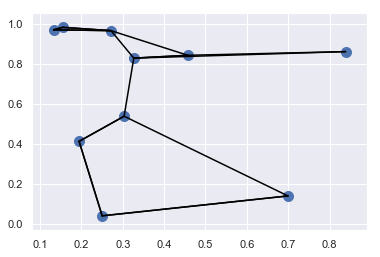

In [103]:
plt.scatter(X[:,0],X[:,1], s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

### Structured data

In [104]:
name=['Alice', 'Bob', 'Cathy', 'Doug']
age=[25,45,37,19]
weight=[55.0,85.5,68.0,61.5]

In [107]:
data=np.zeros(4,dtype={'names':('name','age','weight'),
                      'formats':('U10','i4','f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [108]:
data['name']=name
data['age']=age
data['weight']=weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [110]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [111]:
data[0]

('Alice', 25, 55.)

In [112]:
data[-1]['name']

'Doug'